# Text Classification with 20 Newsgroups Dataset

In [32]:
# Import libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
# Suppress the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
# Step 3: Load the 20 Newsgroups Dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = newsgroups.data  # List of documents
labels = newsgroups.target   # List of labels (categories)
target_names = newsgroups.target_names

print(f"Total Documents: {len(documents)}")
print(f"Categories: {target_names}")

Total Documents: 18846
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [35]:
import nltk

# Download NLTK data files
nltk.download('punkt')       # For tokenization
nltk.download('stopwords')   # For stopword removal
nltk.download('wordnet')     # For lemmatization
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    stop_words = set(stopwords.words('english')) # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words] # Join tokens back to a single string
    return ' '.join(tokens)

# Apply preprocessing
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'] = newsgroups_data['text'].apply(preprocess_text)

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(newsgroups_data['text'], newsgroups_data['target'], test_size=0.2, random_state=42)
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_train: 15076
Length of X_test: 3770
Length of y_train: 15076
Length of y_test: 3770


In [38]:
# Vectorize the text
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
from sklearn.feature_extraction.text import TfidfVectorizer
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
# If not already defined
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data.data)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [39]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
# Predict on the test set
y_pred = model.predict(X_test_vec)
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.9010610079575597
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.87      0.87       151
           comp.graphics       0.79      0.88      0.83       202
 comp.os.ms-windows.misc       0.84      0.87      0.85       195
comp.sys.ibm.pc.hardware       0.71      0.77      0.74       183
   comp.sys.mac.hardware       0.90      0.89      0.89       205
          comp.windows.x       0.90      0.85      0.87       215
            misc.forsale       0.85      0.79      0.82       193
               rec.autos       0.92      0.94      0.93       196
         rec.motorcycles       0.98      0.94      0.96       168
      rec.sport.baseball       0.98      0.99      0.98       211
        rec.sport.hockey       0.97      0.98      0.98       198
               sci.crypt       0.97      0.95      0.96       201
         sci.electronics       0.88      0.87      0.87       202
                 sci.med       0.95      0.96 

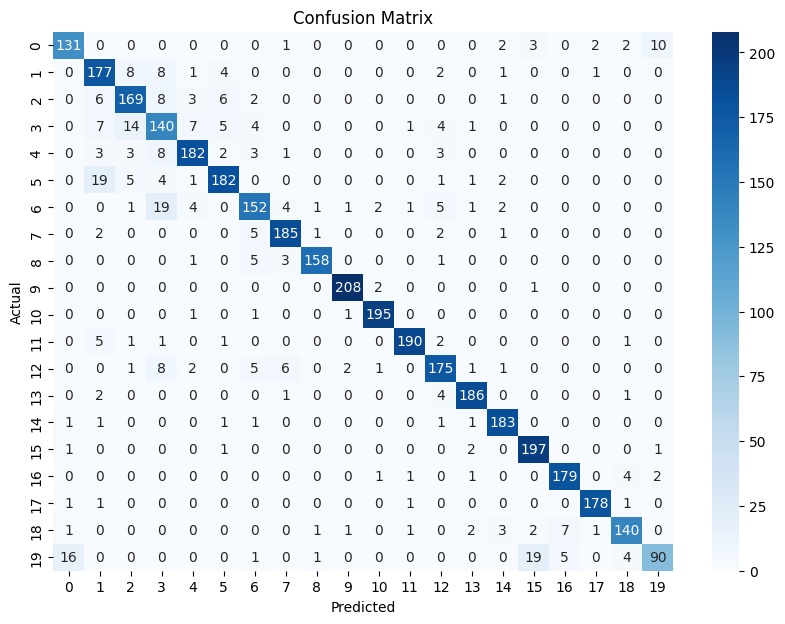

In [40]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Function to predict new text
def predict_new_text(model, vectorizer, text):
    
    text_processed = preprocess_text(text) # Preprocess the text
    
    text_vectorized = vectorizer.transform([text_processed]) # Vectorize the text
    
    prediction = model.predict(text_vectorized) # Predict the category
      
    category_name = newsgroups.target_names[prediction[0]] # Get the category name
    
    return category_name

In [42]:
# Test the function with some new text
test_text = "God, beliefs, and morality debate"
predicted_category = predict_new_text(model, vectorizer, test_text)
print(f'Test Text: "{test_text}"\nPredicted Category: "{predicted_category}"')

Test Text: "God, beliefs, and morality debate"
Predicted Category: "alt.atheism"


In [ ]:
'''from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Search dataset and vectorizer (independent of your classification setup)
search_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
search_vectorizer = TfidfVectorizer(stop_words='english')
search_tfidf_matrix = search_vectorizer.fit_transform(search_data.data)'''


In [ ]:
'''from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def retrieve_documents(query, top_k=5):
    query_vec = search_vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, search_tfidf_matrix).flatten()

    if np.max(similarities) == 0:
        return []

    top_indices = similarities.argsort()[-top_k:][::-1]
    results = [(search_data.data[i], similarities[i]) for i in top_indices]
    return results

while True:
    query = input("\nEnter your search query (or 'exit' to quit): ")
    if query.lower() == 'exit':
        print("Exiting...")
        break

    results = retrieve_documents(query, top_k=5)
    if not results:
        print("No results found. Try another query.")
        continue

    print(f"\nTop Results for: '{query}'")
    for i, (doc, score) in enumerate(results):
        print(f"\nResult {i+1} (Score: {score:.4f}):")
        print(doc[:500])  # Show first 500 characters
        print("---")''''''''''''
